<a href="https://colab.research.google.com/github/harshith-118/MachineLearningProjects/blob/main/JPX_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from IPython.display import display_html
sns.set_context("notebook")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def prep_prices(price):
    
    from decimal import ROUND_HALF_UP, Decimal
    
    pcols = ["Open","High","Low","Close"]

    price.ExpectedDividend.fillna(0,inplace=True)
    
    def qround(x):
        return float(Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP))
    
    def adjust_prices(df):
        df = df.sort_values("Date", ascending=False)
        df.loc[:, "CumAdjust"] = df["AdjustmentFactor"].cumprod()

        # generate adjusted prices
        for p in pcols:     
            df.loc[:, p] = (df["CumAdjust"] * df[p]).apply(qround)
        
        df.ffill(inplace=True)
        df.bfill(inplace=True)
        
        #df.loc[:, "Target"] = ((df.Close.shift(-1)/df.Close.shift(-2) - 1)).shift(3).fillna(df.Target)
        df.Target.fillna(0,inplace=True)

        return df

    # generate Adjusted
    price = price.sort_values(["SecuritiesCode", "Date"])
    price = price.groupby("SecuritiesCode").apply(adjust_prices).reset_index(drop=True)
    price = price.sort_values("RowId")
    return price

In [ ]:
! pip install kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c jpx-tokyo-stock-exchange-prediction

 99% 223M/224M [00:01<00:00, 161MB/s]
100% 224M/224M [00:01<00:00, 135MB/s]


In [ ]:
! unzip jpx-tokyo-stock-exchange-prediction

Archive:  jpx-tokyo-stock-exchange-prediction.zip
  inflating: data_specifications/options_spec.csv  
  inflating: data_specifications/stock_fin_spec.csv  
  inflating: data_specifications/stock_list_spec.csv  
  inflating: data_specifications/stock_price_spec.csv  
  inflating: data_specifications/trades_spec.csv  
  inflating: example_test_files/financials.csv  
  inflating: example_test_files/options.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/secondary_stock_prices.csv  
  inflating: example_test_files/stock_prices.csv  
  inflating: example_test_files/trades.csv  
  inflating: jpx_tokyo_market_prediction/__init__.py  
  inflating: jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: stock_list.csv          
  inflating: supplemental_files/financials.csv  
  inflating: supplemental_files/options.csv  
  inflating: supplemental_files/secondary_stock_prices.csv  
  inflating: supplemental_files/stock_

In [ ]:
df_train = pd.read_csv("/content/train_files/stock_prices.csv", parse_dates=["Date"])
df_train = df_train[df_train.Date>"2020-10-02"] #Targets not Nulls and 2000 secutities data
df_train = prep_prices(df_train)

df_test = pd.read_csv("/content/supplemental_files/stock_prices.csv", parse_dates=["Date"])
df_test = prep_prices(df_test)

In [ ]:
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SecuritiesCode', 'Target']
df_stocks = df_train[cols].copy()

# create new dataframe with just closing price for each stock
df = df_stocks.pivot(index='Date', columns='SecuritiesCode', values='Close')
df

SecuritiesCode,1301,1332,1333,1375,1376,1377,1379,1381,1407,1413,...,9982,9983,9984,9987,9989,9990,9991,9993,9994,9997
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-05,2819.0,453.0,2412.0,2062.0,1615.0,3775.0,2238.0,3330.0,2133.8,1978.0,...,1799.0,66790.0,6750.0,3980.0,4010.0,571.0,951.0,1794.0,2169.0,934.0
2020-10-06,2824.0,450.0,2398.0,2044.0,1588.0,3785.0,2236.0,3355.0,2203.1,1988.0,...,1829.0,66700.0,6913.0,4060.0,3985.0,573.0,952.0,1788.0,2185.0,943.0
2020-10-07,2780.0,446.0,2345.0,2035.0,1541.0,3730.0,2243.0,3300.0,2237.7,1990.0,...,1868.0,66490.0,6955.0,3980.0,3940.0,569.0,932.0,1808.0,2185.0,960.0
2020-10-08,2786.0,443.0,2345.0,2035.0,1502.0,3800.0,2254.0,3250.0,2330.8,1976.0,...,1862.0,67290.0,7085.0,4025.0,4045.0,568.0,944.0,1824.0,2195.0,953.0
2020-10-09,2799.0,436.0,2336.0,2099.0,1510.0,3745.0,2244.0,3300.0,2469.2,1989.0,...,1711.0,69220.0,6997.0,4020.0,4080.0,569.0,934.0,1840.0,2169.0,958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,2951.0,567.0,2269.0,1248.0,1381.0,3125.0,1889.0,3160.0,6430.0,2126.0,...,1725.0,70500.0,6208.0,3070.0,3055.0,528.0,773.0,1680.0,2358.0,668.0
2021-11-30,2900.0,573.0,2277.0,1217.0,1348.0,3125.0,1842.0,3135.0,6550.0,2118.0,...,1690.0,67400.0,6030.0,3085.0,2989.0,520.0,768.0,1680.0,2328.0,667.0
2021-12-01,2911.0,574.0,2299.0,1231.0,1353.0,3135.0,1889.0,3185.0,6290.0,2123.0,...,1722.0,67080.0,5900.0,3090.0,2937.0,522.0,770.0,1671.0,2340.0,685.0


In [ ]:
def absHighPass(df, absThresh):
    df.loc[:, ]
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

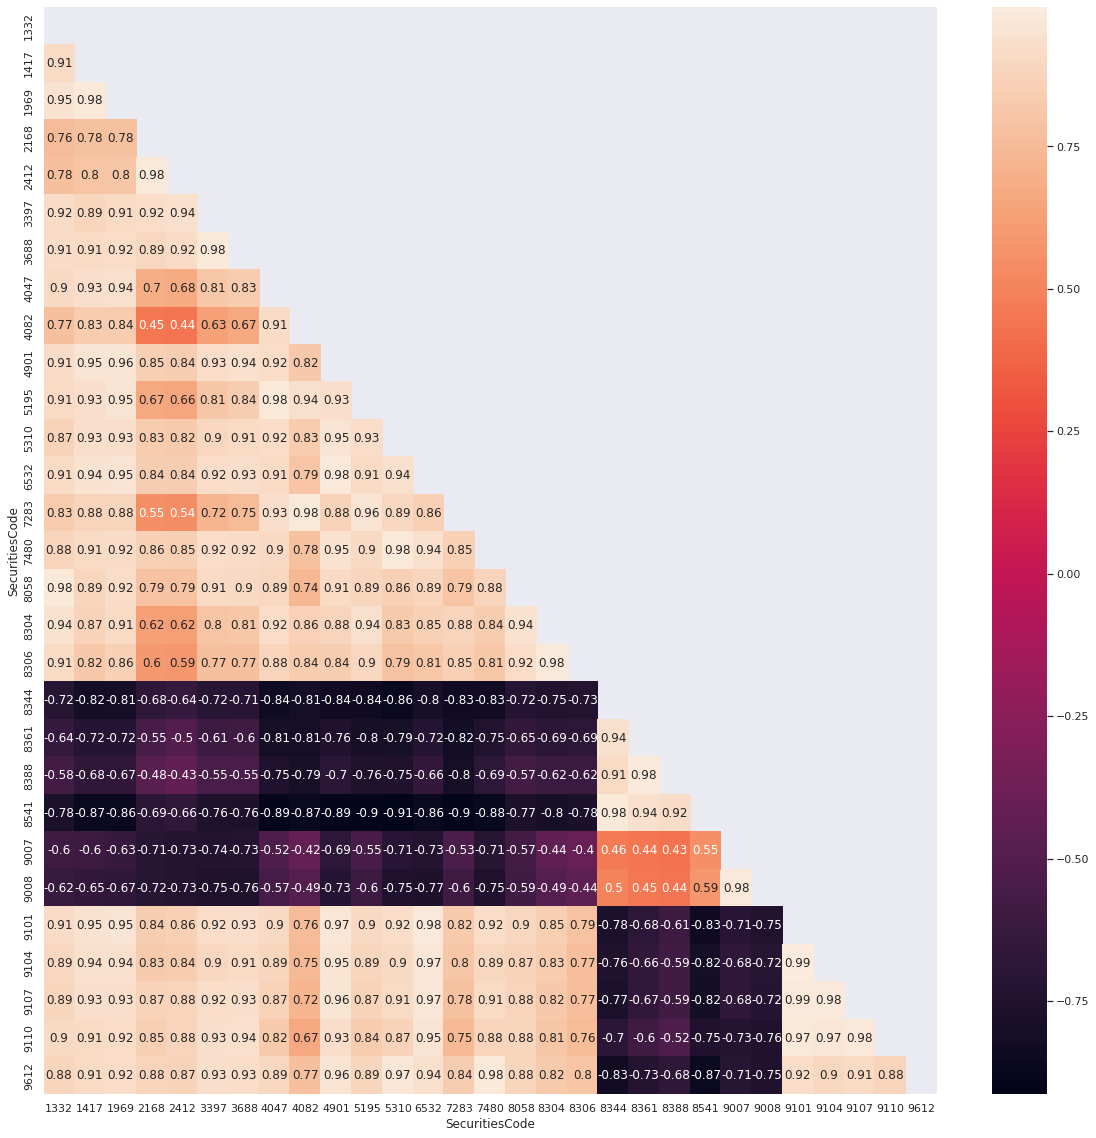

In [ ]:
mat = absHighPass(df.corr(),0.975)
mask = np.triu(np.ones_like(mat))
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mat, annot=True, mask=mask)
plt.show()

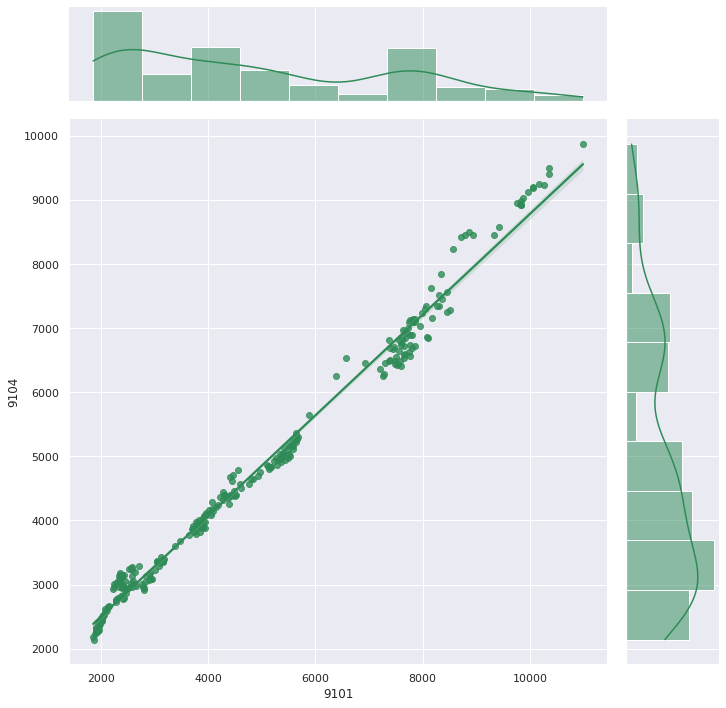

In [ ]:
sns.jointplot(9101, 9104, df, kind='reg', color='seagreen', height=10);

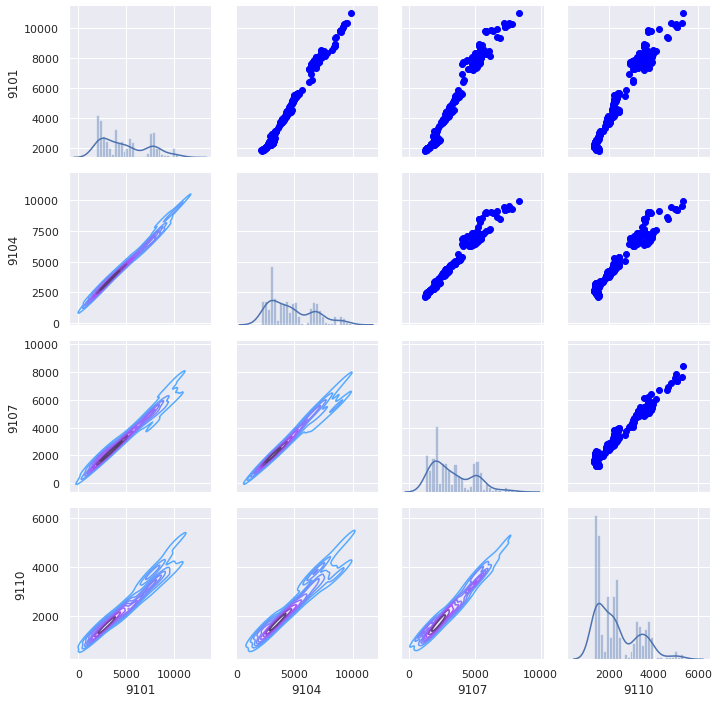

In [ ]:
fig = sns.PairGrid(df[[9101, 9104, 9107, 9110]].dropna())
fig.map_upper(plt.scatter, color='blue')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30);

In [ ]:
Code = 9007

In [ ]:
STOCK = df_stocks[df_stocks.SecuritiesCode==Code].set_index("Date")
TEST = df_test[df_test.SecuritiesCode==Code].set_index("Date")
display_html(STOCK)

,Open,High,Low,Close,Volume,SecuritiesCode,Target
Date,,,,,,,
2020-10-05,2650.0,2702.0,2634.0,2680.0,732700,9007,-0.009630
2020-10-06,2700.0,2712.0,2660.0,2700.0,633800,9007,0.004488
2020-10-07,2678.0,2679.0,2642.0,2674.0,553300,9007,-0.013775
2020-10-08,2680.0,2718.0,2670.0,2686.0,581900,9007,-0.010948
2020-10-09,2675.0,2680.0,2643.0,2649.0,584600,9007,0.008397
...,...,...,...,...,...,...,...
2021-11-29,2170.0,2185.0,2124.0,2130.0,1263500,9007,-0.006859
2021-11-30,2176.0,2239.0,2172.0,2187.0,2712400,9007,-0.011510
2021-12-01,2170.0,2205.0,2141.0,2172.0,905800,9007,0.030275


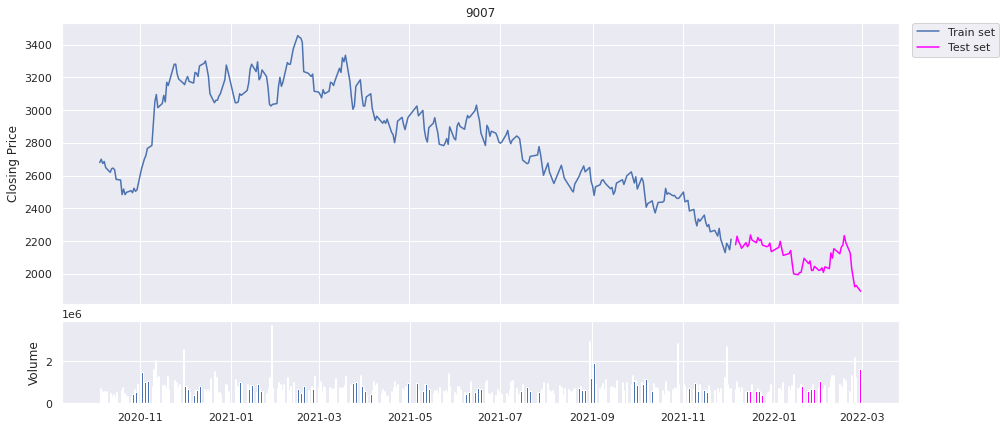

In [ ]:
plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(STOCK.index, STOCK.Close, label="Train set")
top.plot(TEST.index,TEST.Close, color="magenta", label="Test set")
bottom.bar(STOCK.index, STOCK.Volume)
bottom.bar(TEST.index, TEST.Volume, color="magenta")
top.legend(bbox_to_anchor=(1.01, 1., 0.11, 0.), loc='upper right', borderaxespad=0.)
 
# set the labels
top.axes.xaxis.set_ticklabels([])
top.set_title(Code)
top.grid(True)
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')
bottom.grid(True);

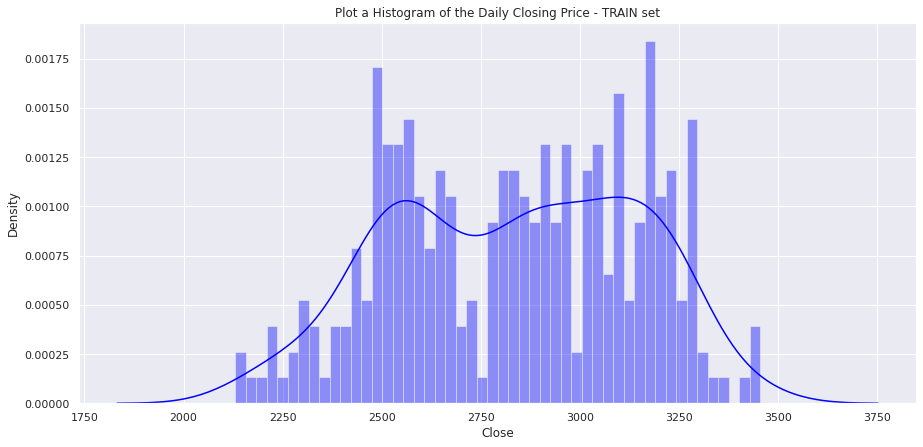

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Plot a Histogram of the Daily Closing Price - TRAIN set")
sns.distplot(STOCK['Close'].dropna(), bins=50, color='blue');

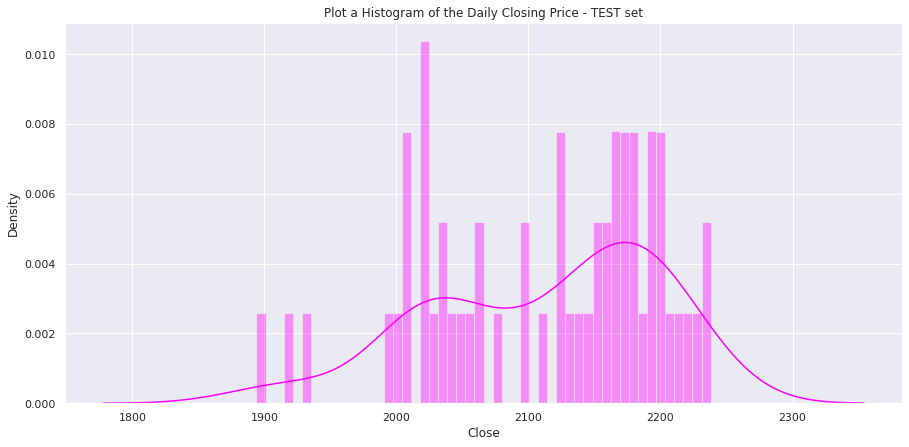

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Plot a Histogram of the Daily Closing Price - TEST set")
sns.distplot(TEST['Close'].dropna(), bins=50, color='magenta');

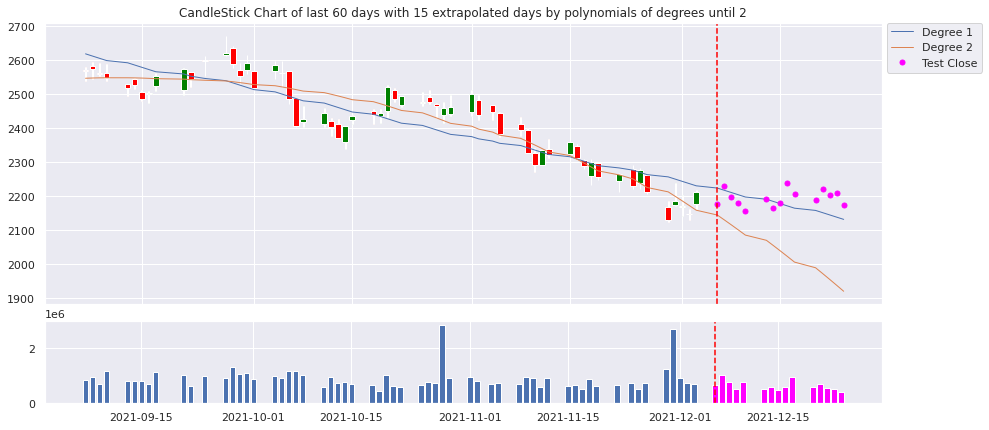

In [ ]:
d = 60 # days to plot
e = 15  # days to extrapolate
g = 2  # max degree of regression

width = .8
width2 = .1
col1 = 'green'
col2 = 'red'

LDAYS = STOCK.tail(d)
up = LDAYS[LDAYS.Close>=LDAYS.Open]
down = LDAYS[LDAYS.Close<LDAYS.Open]
fut = TEST[TEST.index<=TEST.head(e).index[-1]]

xd = (LDAYS.index).append(TEST.head(e).index)

x = [x for x in range(d)]
p = {}
for i in range(g):
    z = np.polyfit(x, LDAYS.Close, i+1)
    p[i] = np.poly1d(z)
x = [x for x in range(d+e)]

plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.set_title(f"CandleStick Chart of last {d} days with {e} extrapolated days by polynomials of degrees until {g}")
top.axes.xaxis.set_ticklabels([])
for i in range(g):
    top.plot(xd, p[i](x), linewidth=1, label=f'Degree {i+1}')
top.plot(fut.index,fut.Close,  marker="o", markersize=5, color="magenta", linewidth=0, label="Test Close")
top.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
top.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
top.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)
top.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
top.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
top.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)
top.axvline(TEST.index[0], color='red', linestyle='--')
top.legend(bbox_to_anchor=(1.01, 1., 0.11, 0.), loc='upper right', borderaxespad=0.)
top.grid(True)

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(xd, np.append(LDAYS['Volume'].values,np.zeros(e))) 
bottom.bar(fut.index, fut.Volume, color="magenta") 
bottom.axvline(TEST.index[0], color='red', linestyle='--')

bottom.grid(True)
plt.show();

In [ ]:
from fbprophet import Prophet

def train_ph_model(df):
    m = Prophet(daily_seasonality=True, changepoint_prior_scale=0.1,yearly_seasonality=True)
    m.add_seasonality(name='monthly', period=21, fourier_order=5)
    ph_df = df[['Close','Date']].copy()
    ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    m.fit(ph_df)
    return m

In [ ]:
m = train_ph_model(STOCK["Close"].reset_index().copy())
future_prices = m.make_future_dataframe(periods=90, freq='d')

In [ ]:
future_prices

,ds
0,2020-10-05
1,2020-10-06
2,2020-10-07
3,2020-10-08
4,2020-10-09
...,...
372,2022-02-27
373,2022-02-28
374,2022-03-01
375,2022-03-02


In [ ]:
forecast = m.predict(future_prices)
result = TEST[["Close"]].join(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index("ds"), how='left')
display_html(result)

,Close,yhat,yhat_lower,yhat_upper
Date,,,,
2021-12-06,2178.0,2079.446668,1996.658356,2164.281803
2021-12-07,2230.0,2053.525283,1970.112816,2141.777908
2021-12-08,2198.0,2005.349345,1918.116624,2092.159906
2021-12-09,2181.0,1963.509729,1878.862136,2049.873270
2021-12-10,2156.0,1928.772081,1846.378680,2007.621482
2021-12-13,2191.0,1848.476814,1767.941498,1928.799806
2021-12-14,2166.0,1819.199459,1734.593898,1899.477129
2021-12-15,2181.0,1790.411953,1712.046730,1877.676843
2021-12-16,2238.0,1772.824944,1685.129159,1856.163118


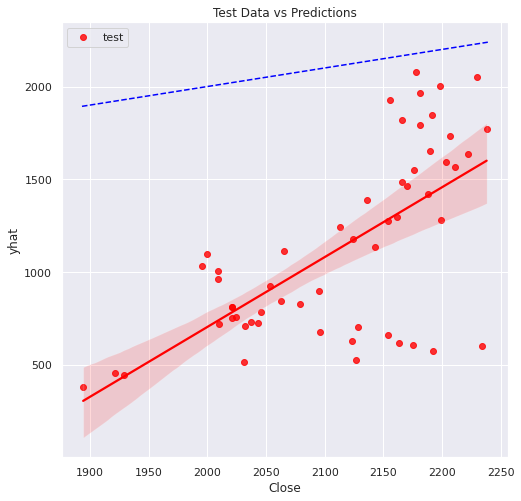

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
d_x = np.linspace(start=TEST.Close.min() - 1, stop=TEST.Close.max() + 1, num=100)
sns.regplot(x=TEST.Close, y=result['yhat'], color='red', label='test', ax=ax)
sns.lineplot(x=d_x, y=d_x, dashes={'linestyle': ''}, color='blue', ax=ax)
ax.lines[1].set_linestyle('--')
ax.set(title='Test Data vs Predictions');

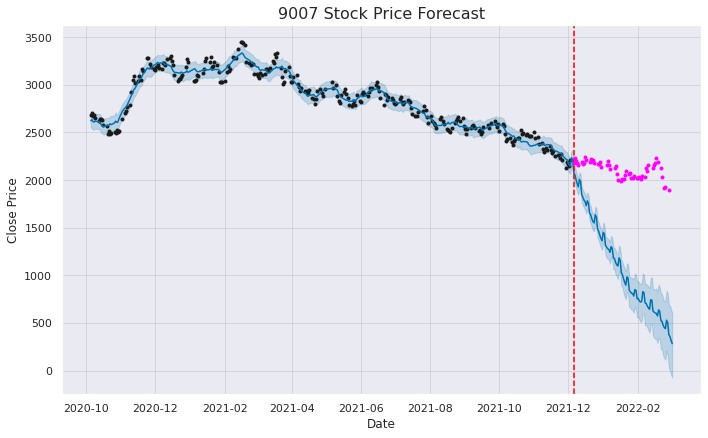

In [ ]:
fig = m.plot(forecast)
plt.title(f"{Code} Stock Price Forecast", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.axvline(TEST.index[0], color='red', linestyle='--')
plt.plot(TEST.index, TEST.Close,  marker="o", markersize=3, color="magenta", linewidth=0, label="Test Close")
plt.show()

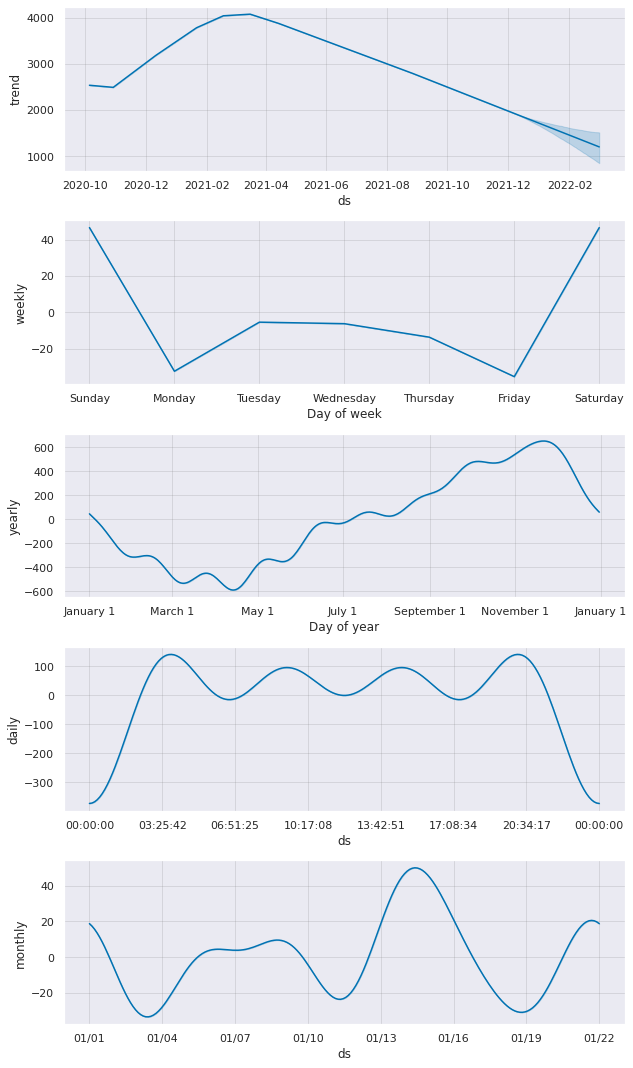

In [ ]:
fig2 = m.plot_components(forecast)
plt.show()

In [ ]:

ph_df = STOCK["Close"].reset_index().copy()
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
m = Prophet(changepoint_prior_scale=0.12,yearly_seasonality=True,daily_seasonality=True).fit(ph_df)
future = m.make_future_dataframe(periods=16, freq='W')
fcst = m.predict(future)

In [ ]:
fcst = m.predict(future_prices)
result2 = TEST[["Close"]].join(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index("ds"), how='left')
display_html(result2)

,Close,yhat,yhat_lower,yhat_upper
Date,,,,
2021-12-06,2178.0,2058.682082,1978.933304,2145.562157
2021-12-07,2230.0,2036.450247,1949.709904,2123.754720
2021-12-08,2198.0,1995.490022,1909.457381,2078.938851
2021-12-09,2181.0,1965.126222,1886.094374,2048.854217
2021-12-10,2156.0,1934.362453,1848.586763,2013.967364
2021-12-13,2191.0,1849.104869,1766.990965,1930.549860
2021-12-14,2166.0,1822.566055,1739.996404,1905.159477
2021-12-15,2181.0,1778.360976,1695.842273,1857.432695
2021-12-16,2238.0,1745.859498,1660.428201,1833.582536


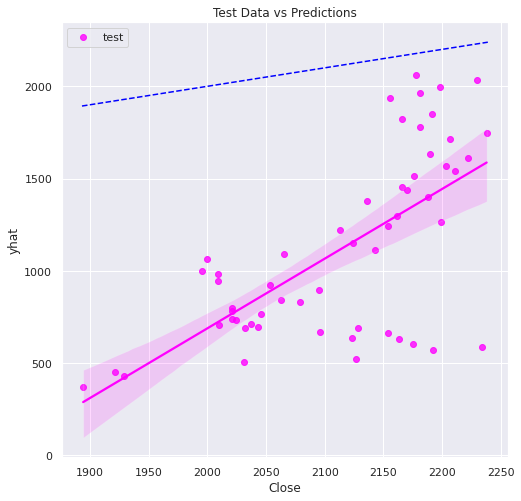

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
d_x = np.linspace(start=TEST.Close.min() - 1, stop=TEST.Close.max() + 1, num=100)
sns.regplot(x=TEST.Close, y=result2['yhat'], color='magenta', label='test', ax=ax)
sns.lineplot(x=d_x, y=d_x, dashes={'linestyle': ''}, color='blue', ax=ax)
ax.lines[1].set_linestyle('--')
ax.set(title='Test Data vs Predictions');

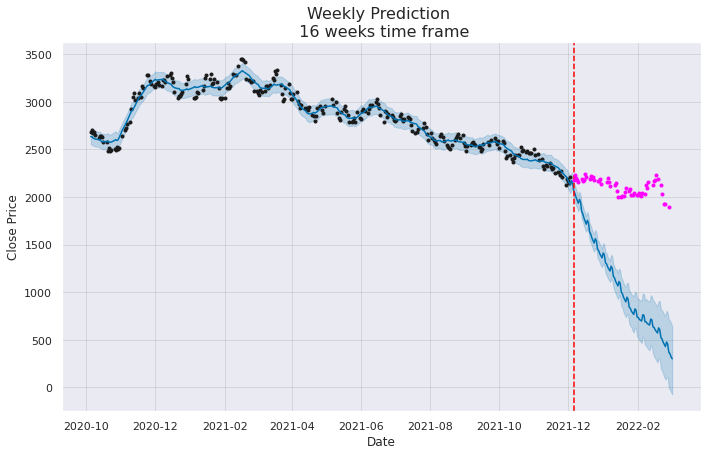

In [ ]:
fig = m.plot(fcst)
plt.title("Weekly Prediction \n 16 weeks time frame", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.axvline(TEST.index[0], color='red', linestyle='--')
plt.plot(TEST.index, TEST.Close,  marker="o", markersize=3, color="magenta", linewidth=0, label="Test Close")
plt.show()

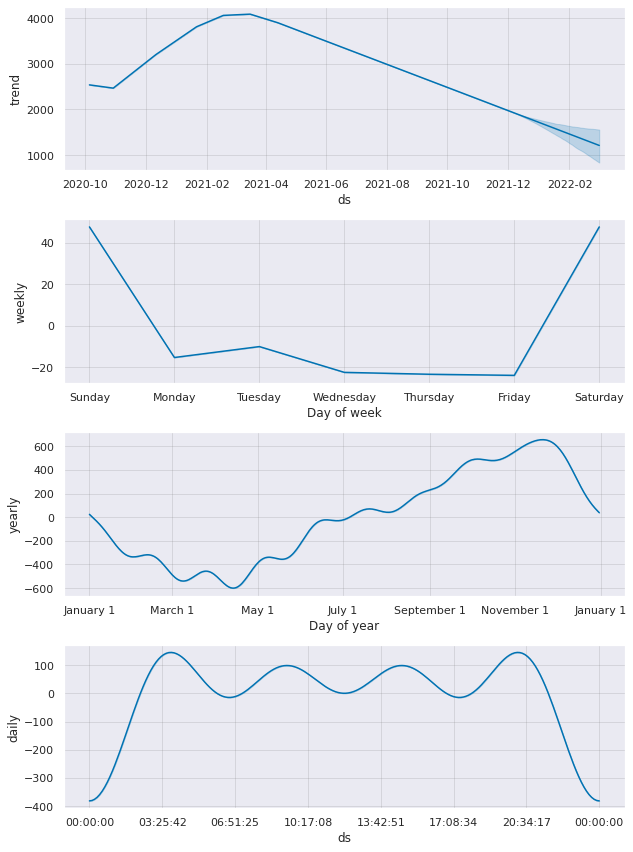

In [ ]:
fig = m.plot_components(fcst)
plt.show()

In [ ]:
def concat_df(df1, df2):
    df1 = pd.concat([df1, df2],
                    ignore_index=True, sort=False
                    ).drop_duplicates(["RowId"], keep="first")
    return df1

def calc_spread_return_per_day(df, portfolio_size=200, toprank_weight_ratio=2):
    weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
    purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
    short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
    return purchase - short

def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size=200, toprank_weight_ratio=2):
    buf = df.groupby('Date').apply(calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio, buf

def rank(df):
    df.loc[:,"Rank"] = df.groupby("Date")["Target"].rank(ascending=False, method="first") - 1 
    df.loc[:,"Rank"] = df["Rank"].astype("int")
    return df

In [ ]:
df_test = rank(df_test[["Date","SecuritiesCode","Target"]]).sort_values(["Date","Rank"])
print("Score:",calc_spread_return_sharpe(df_test)[0])

import jpx_tokyo_market_prediction
e = jpx_tokyo_market_prediction.make_env()
i = e.iter_test()
for p, _, _, _, _, s in i:
    m = df_test[df_test['Date']==p["Date"].iloc[0]].set_index("SecuritiesCode")["Rank"]
    s.loc[:,"Rank"] = s.SecuritiesCode.map(m)
    e.predict(s)

Score: 5.434704919895069
This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
